# Astadnik
# Vpaladii

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline


In [2]:
print(np.random.rand(5, 5))

[[0.60566292 0.76036919 0.11078253 0.20707696 0.85204553]
 [0.51370148 0.79331834 0.1592359  0.02311547 0.37374808]
 [0.68855779 0.04165341 0.60235187 0.372714   0.90681048]
 [0.36181296 0.32393691 0.62519291 0.191389   0.80154688]
 [0.61455954 0.90182722 0.43805033 0.79692568 0.13792252]]


In [3]:
print(np.arange(12).reshape(4, 3))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [4]:
def f(n):
    rez = np.arange(0, 1, 1 / n)
    print(rez.shape)
    return rez

In [5]:
print(np.random.rand(10, 12)[0:4, 8:12])

[[0.50429145 0.17974112 0.86556991 0.30445662]
 [0.95692743 0.9072933  0.89299406 0.38816628]
 [0.67066148 0.23838718 0.26945368 0.24833437]
 [0.67776409 0.84815676 0.31787491 0.55496879]]


(352,)
(352,)
(352,)
(352,)
(352,)
(352,)
(352,)
(352,)
(352,)
(352,)


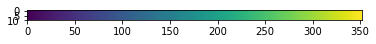

In [6]:
m = 352
matrix = np.array([f(m) for i in np.arange(10)])
plt.imshow(matrix)

(440, 352)


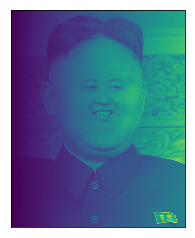

In [7]:
image = np.sum(mpimg.imread('https://i.imgur.com/zNmM0AK.png'), axis = 2)
print(image.shape)
plt.yticks([])
plt.xticks([])
plt.imshow(np.resize(matrix, image.shape) * image)

In [8]:
amaro = {
    "red":   {"x": [0, 30, 82, 128, 145, 255], "y": [19, 62, 148, 188, 200, 250]},
    "green": {"x": [0, 48, 115, 160, 233, 255], "y": [0, 72, 188, 220, 245, 255]},
    "blue":  {"x": [0, 35, 106, 151, 215, 240, 255], "y": [25, 80, 175, 188, 215, 235, 245]}
}
mayfair = {
    "red":   {"x": [0, 85, 125, 221, 254], "y": [30, 110, 170, 232, 242]},
    "green": {"x": [0, 40, 80, 142, 188, 255], "y": [15, 55, 95, 196, 215, 230]},
    "blue":  {"x": [0, 45, 85, 135, 182, 235, 255], "y": [15, 60, 115, 185, 215, 230, 225]}
}
hudson = {
    "red":   {"x": [0, 42, 85, 124, 170, 215, 255], "y": [35, 68, 115, 165, 200, 228, 255]},
    "green": {"x": [0, 45, 102, 140, 192, 255], "y": [0, 60, 135, 182, 215, 255]},
    "blue":  {"x": [0, 24, 60, 105, 145, 210, 255], "y": [0, 42, 100, 170, 208, 235, 245]}
}
x_pro = {
    "red":   {"x": [0, 42, 105, 148, 185, 255], "y": [0, 28, 100, 160, 208, 255]},
    "green": {"x": [0, 40, 85, 125, 165, 212, 255], "y": [0, 25, 75, 130, 180, 230, 255]},
    "blue":  {"x": [0, 40, 82, 125, 170, 235, 255], "y": [30, 58, 90, 125, 160, 210, 222]}
}
toaster = {
    "red":   {"x": [0, 50, 105, 145, 190, 255], "y": [120, 160, 198, 215, 230, 255]},
    "green": {"x": [0, 22, 125, 255], "y": [0, 60, 180, 255]},
    "blue":  {"x": [0, 40, 80, 122, 185, 255], "y": [50, 60, 102, 148, 185, 210]}
}
nashville = {
    "red":   {"x": [0, 30, 58, 83, 112, 190, 255], "y": [0, 5, 25, 85, 140, 220, 255]},
    "green": {"x": [0, 20, 50, 132, 190, 255], "y": [0, 5, 62, 150, 205, 225]},
    "blue":  {"x": [0, 40, 85, 212, 255], "y": [65, 90, 115, 185, 205]}
}

filters = {"amaro": amaro, "mayfair": mayfair, "hudson": hudson, 
           "x_pro": x_pro, "toaster": toaster, "nashville": nashville}

In [9]:
def interp(values, f_x, f_y):
    X = np.array(f_x).reshape((-1, 1))
    Y = np.array(f_y).reshape((-1, 1))
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    X = np.hstack((X, (X[:,1]**2).reshape((-1, 1))))
    X = np.hstack((X, (X[:,1]**3).reshape((-1, 1))))
    w = np.linalg.pinv(X.T @ X) @ X.T @ Y
    f = lambda x: (w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3)
    return np.array([f(val) for val in values])

In [10]:
def apply_filter(image, filter_):
    filtered_image = np.copy(image)[:, :, :3]
    red_channel = interp(filtered_image[:,:,0]*255, filter_["red"]["x"], filter_["red"]["y"]) / 255
    red_channel = np.maximum(np.minimum(1, red_channel), 0)
    green_channel = interp(filtered_image[:,:,1]*255, filter_["green"]["x"], filter_["green"]["y"]) / 255
    green_channel = np.maximum(np.minimum(1, green_channel), 0)
    blue_channel = interp(filtered_image[:,:,2]*255, filter_["blue"]["x"], filter_["blue"]["y"]) / 255
    blue_channel = np.maximum(np.minimum(1, blue_channel), 0)
    filtered_image[:,:,0] = red_channel
    filtered_image[:,:,1] = green_channel
    filtered_image[:,:,2] = blue_channel
    return filtered_image

In [11]:
def contour(image, n = 1):
    filtered_image = (image[:, :, 0] + image[:, :, 1] + image[:, :, 2]) / 3
    rez = np.zeros((image.shape[0] - (n * 2), image.shape[1] - (n * 2)))
    for i in np.arange(image.shape[0] - (n * 2)):
        for j in np.arange(image.shape[1] - (n * 2)):
            for x in np.arange(-n, n + 1):
                for y in np.arange(-n, n + 1):
                    if x or y:
                        rez[i, j] += abs(rez[i, j] - filtered_image[i + x, j + y])
#         print('.', end = '')
    return rez

In [12]:
def make_ellipse(h, w, n=3):
    el = np.zeros((h, w), dtype=float)
    x_r = int(h * 0.95 / 2)
    y_r = int(w * 0.95 / 2)
    center = (h//2, w//2)
#     print(x_r, y_r, center)
    for i in range(w):
        for j in range(h):
            p = (center[0] - j, center[1] - i)
            d = p[1] ** 2 / y_r ** 2 + p[0] ** 2 / x_r ** 2
            el[j,i] = 1 - d/n
    return el

def apply_vignette(image):
    new_image = np.copy(image)
    el = make_ellipse(image.shape[0], image.shape[1])
    red = new_image[:,:,0]
    green = new_image[:,:,1]
    blue = new_image[:,:,2]
    red = np.multiply(el, red)
    green = np.multiply(el, green)
    blue = np.multiply(el, blue)
    new_image[:,:,0] = red
    new_image[:,:,1] = green
    new_image[:,:,2] = blue
    return new_image

# image = mpimg.imread("01_normal.png")
# v = apply_vignette(image)
# plt.imshow(v)

In [13]:
tmp = ['', {}]
def f(url, filt, vignette):
    try:
        image = mpimg.imread(url)
    except:
        print('Wrong url')
        return
    
    global tmp
    if not url == tmp[0]:
        tmp = [url, {}]
    if filt in tmp[1]:
        changed = tmp[1][filt]
    else:
        if filt == 'contour':
            tmp[1][filt] = contour(image)
        else:
            tmp[1][filt] = apply_filter(image, filters[filt])
    fig, axis = plt.subplots(1, 2, figsize=(20, 20))
    axis[0].imshow(image)
    if filt == 'contour':
        axis[1].imshow(tmp[1][filt], cmap='gray')
    else:
        axis[1].imshow(apply_vignette(tmp[1][filt]) if vignette else tmp[1][filt])
    axis[0].set_xticks([]), axis[0].set_yticks([])
    axis[1].set_xticks([]), axis[1].set_yticks([])

In [14]:
# url = interact(f, url='Enter image\'s url');
interact(f, url = 'https://i.imgur.com/zNmM0AK.png', filt = ['contour', *filters.keys()], vignette = True);

interactive(children=(Text(value='https://i.imgur.com/zNmM0AK.png', description='url'), Dropdown(description='…